<h1>K-Means

Método de Clusterização não-supervisionado, onde definimos à priori a quantidade de clusters para segmentar os nossos dados.

Para k=2:

1- Define as centróides dos grupos C1 e C2 aleatoriamente

2- Calcula a distância euclidiana (reta) entre a centróide e cada um dos pontos

3- O algoritmo itera várias vezes calculando a nova posição buscando minimizar a distãncia entre os pontos

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the CSV file
df_clientes = pd.read_csv('examples/Mall_Customers.csv')

In [3]:
#checking the DF
df_clientes.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#preparing the data
df_clientes = df_clientes.rename(columns = {'Genre':'Gender'})
df_clientes.drop(['CustomerID'],axis=1,inplace=True)
df_clientes.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
#getting information
df_clientes.info()
print("\nLines and columns:",df_clientes.shape)
print('\n',df_clientes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB

Lines and columns: (200, 4)

               Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

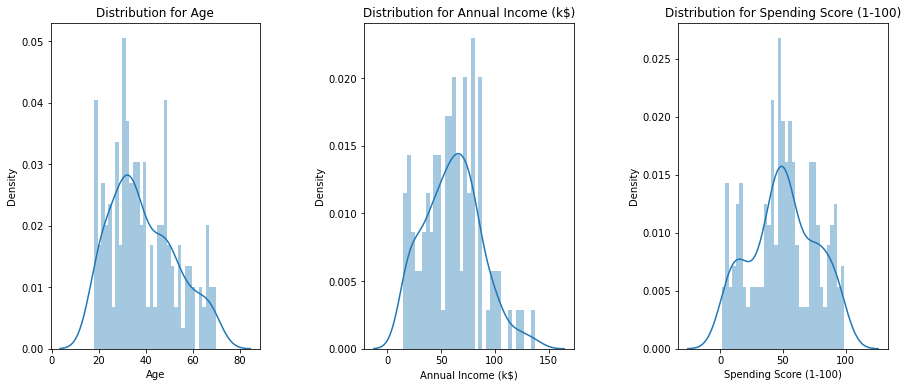

In [15]:
#Plotting Distribution for Age, Annual Income, and Spending Score

plt.figure(1,figsize=(15,6))
n=0
for coluna in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n) #3 subplots
  plt.subplots_adjust(hspace=0.5,wspace=0.5) #adjusting space between graphs
  sns.distplot(df_clientes[coluna],bins=35) #plotting a dist plot for each subplot
  plt.title('Distribution for {}'.format(coluna)) 
plt.show()

Female    112
Male       88
Name: Gender, dtype: int64 



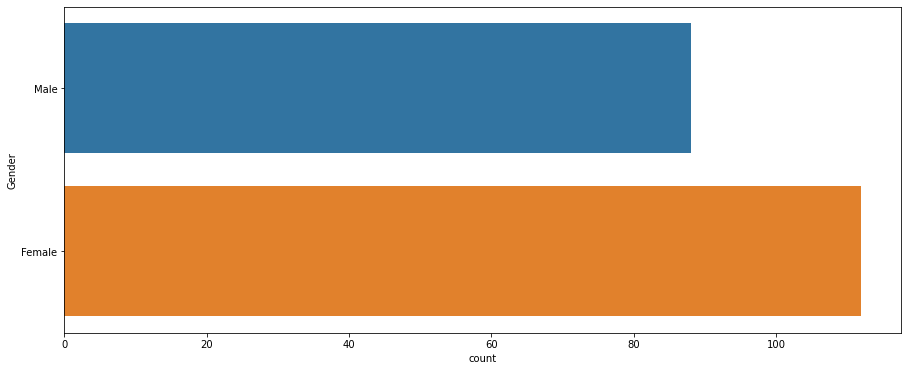

In [9]:
#Checking Gender Division

print(df_clientes['Gender'].value_counts(),'\n')

plt.figure(1,figsize=(15,6))
sns.countplot(y='Gender',data=df_clientes)
plt.show()

<AxesSubplot:>

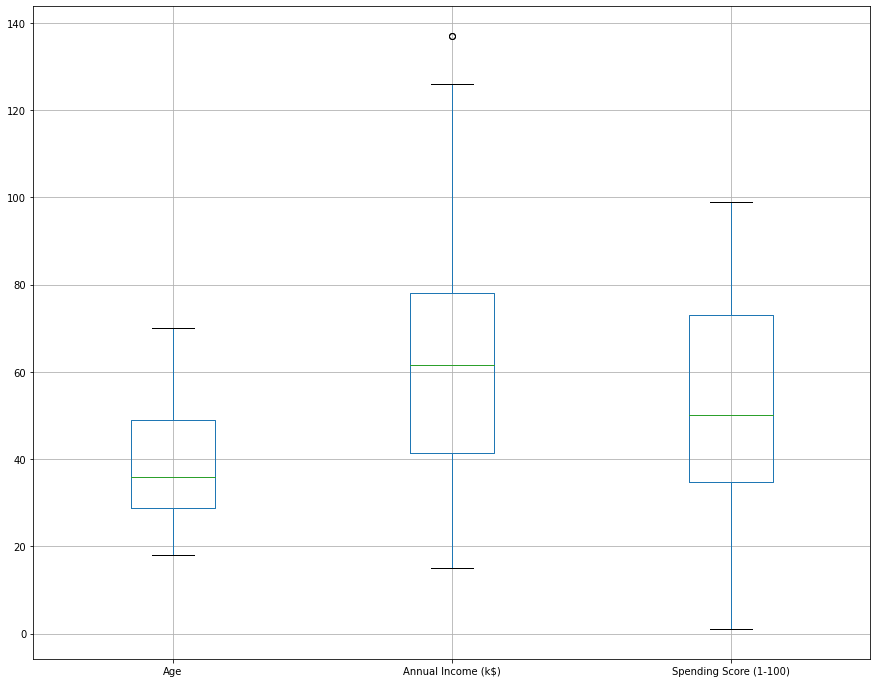

In [10]:
#Checking possible outliers (bubbles outside the boxplot)
plt.figure(1,figsize=(15,12))
df_clientes.boxplot()

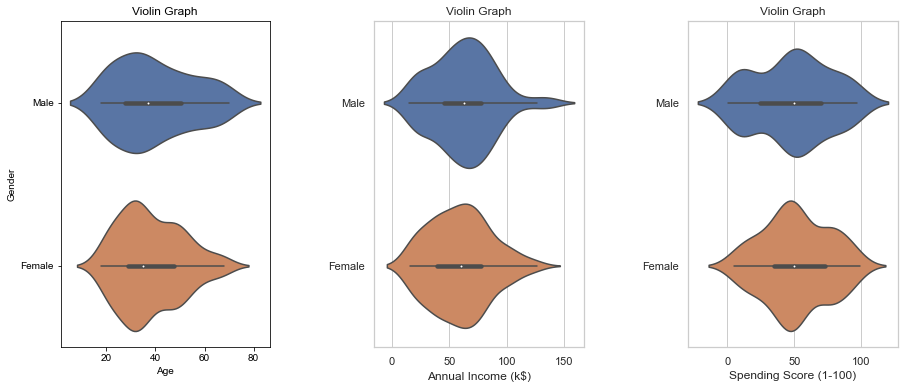

In [16]:
#violin_graph
plt.figure(1,figsize=(15,6))
n=0
for coluna in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=coluna,y='Gender',data=df_clientes)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Graph')
plt.show()

In [ ]:
#analyzing ages
idade_18_25=df_clientes[(df_clientes.Age>=18) & (df_clientes.Age<=25)]['Age']
idade_26_35=df_clientes[(df_clientes.Age>=26) & (df_clientes.Age<=35)]['Age']
idade_36_45=df_clientes[(df_clientes.Age>=36) & (df_clientes.Age<=45)]['Age']
idade_46_55=df_clientes[(df_clientes.Age>=46) & (df_clientes.Age<=55)]['Age']
idade_maior_56=df_clientes[(df_clientes.Age>=56)]['Age']

idade_x=['18-25','26-35','36-45','46-55','>56']
idade_y=[len(idade_18_25.values),len(idade_26_35.values),len(idade_36_45.values),len(idade_46_55.values),len(idade_maior_56.values)]

plt.figure(figsize=(15,8))
sns.barplot(x=idade_x,y=idade_y, palette='mako')
plt.title('Número de consumidores por idade')
plt.xlabel('Idade')
plt.ylabel('Número de consumidores')
plt.show()

In [ ]:
#procurando relações entre o salário e o score
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df_clientes)

In [ ]:
#dividindo o score em intervalos
ss_1_20=df_clientes[(df_clientes['Spending Score (1-100)']>=1) & (df_clientes['Spending Score (1-100)']<=20)]['Spending Score (1-100)']
ss_21_40=df_clientes[(df_clientes['Spending Score (1-100)']>=21) & (df_clientes['Spending Score (1-100)']<=40)]['Spending Score (1-100)']
ss_41_60=df_clientes[(df_clientes['Spending Score (1-100)']>=41) & (df_clientes['Spending Score (1-100)']<=60)]['Spending Score (1-100)']
ss_61_80=df_clientes[(df_clientes['Spending Score (1-100)']>=61) & (df_clientes['Spending Score (1-100)']<=80)]['Spending Score (1-100)']
ss_81_100=df_clientes[(df_clientes['Spending Score (1-100)']>81)]['Spending Score (1-100)']


ss_x=['1-20','21-40','41-60','61-80','80-100']
ss_y=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,8))
sns.barplot(x=ss_x,y=ss_y, palette='mako')
plt.title('Spending Score')
plt.xlabel('Score')
plt.ylabel('Número de consumidores no intervalo')
plt.show()

In [ ]:
#analisando os salários
ai_0_30=df_clientes[(df_clientes['Annual Income (k$)']>=0) & (df_clientes['Annual Income (k$)']<=30)]['Annual Income (k$)']
ai_31_60=df_clientes[(df_clientes['Annual Income (k$)']>=31) & (df_clientes['Annual Income (k$)']<=60)]['Annual Income (k$)']
ai_61_90=df_clientes[(df_clientes['Annual Income (k$)']>=61) & (df_clientes['Annual Income (k$)']<=90)]['Annual Income (k$)']
ai_91_120=df_clientes[(df_clientes['Annual Income (k$)']>=91) & (df_clientes['Annual Income (k$)']<=120)]['Annual Income (k$)']
ai_121_150=df_clientes[(df_clientes['Annual Income (k$)']>121)]['Annual Income (k$)']



ai_x=['$ 0-30000','$ 30001-60000','$ 60001-90000','$ 90001-120000','$ 120001-150000']
ai_y=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,8))
sns.barplot(x=ai_x,y=ai_y, palette='mako')
plt.title('Salário anual')
plt.xlabel('Faixa salarial')
plt.ylabel('Número de consumidores no intervalo')
plt.show()

In [ ]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [16, 9]
matriz_correlacao=df_clientes[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(matriz_correlacao, annot=True)  #realiza o plot da matriz de correlação
plt.show()

In [17]:
#https://colab.research.google.com/drive/1lwqQg0Ey2AGB5tYI5PRjoYPIDCJZmDJW#scrollTo=U6hxlGOgyPjk